In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
import pathlib

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from datetime import datetime

from src.data import io
from src.visualization import visualize

In [4]:
species = "Corn"
data_dir = pathlib.Path("../data/processed")
train_dir = data_dir.joinpath(species)
model_dir = pathlib.Path("../models")
metadata_file_path = train_dir.joinpath("metadata.json")

print(f"species: {species} - train_dir: {str(train_dir)} - metadata_file_path: {str(metadata_file_path)}")

species: Corn - train_dir: ../data/processed/Corn - metadata_file_path: ../data/processed/Corn/metadata.json


In [5]:
metadata = io.read_metadata(str(metadata_file_path))
model_id = metadata["id"]

print(f"model_id: {model_id}")

model_id: e85c77d0-4dbd-4b68-9a17-bbf0b9b53260


## Training

In [12]:
from src.models.train_model import train, load_dataset, save_model

In [63]:
start_time = datetime.utcnow().strftime("%Y-%m-%d__%H_%M%S")
batch_size = 32
epochs = 20
monitor = "val_loss"
activation = "linear"
learning_rate = 0.1
early_stopping = True

In [64]:
classifier, history, _ = train(str(train_dir), str(model_dir), batch_size, epochs, monitor, start_time, learning_rate, activation, early_stopping)

learning_rate: 0.1 - activation: linear
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 64, 64, 96)        34944     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 256)       2973952   
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 4, 4, 384)         885120    
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 4, 4, 384)         1327488   
_________________________________________________________________
conv2d_29 (Con

In [65]:
save_model(classifier, str(model_dir), model_id, start_time)

Saving model ../models/e85c77d0-4dbd-4b68-9a17-bbf0b9b53260/2020-01-27__01_3806/final.h5


## Evaluation

### Learning rate 0.3

In [92]:
model_metadata_file_path = model_dir.joinpath(model_id, start_time, "metadata.json")
model_metadata = io.read_metadata(str(model_metadata_file_path))

In [93]:
model_metadata

{'id': 'f2fe0505-be44-4162-be1a-2f9258fb4537',
 'created_date': '2020-01-26 22:15:59',
 'arguments': {'batch_size': 32, 'epochs': 20, 'monitor': 'val_loss'},
 'dataset': {'id': 'f2fe0505-be44-4162-be1a-2f9258fb4537',
  'species': 'Corn',
  'num_classes': 4,
  'class_names': ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
   'Corn_(maize)___Common_rust_',
   'Corn_(maize)___Northern_Leaf_Blight',
   'Corn_(maize)___healthy'],
  'created_date': '2020-01-26 05:25:25',
  'file_counts': {'train': 1517, 'test': 506, 'eval': 506}},
 'history': {'loss': [1.18753179495639,
   0.2875334475427232,
   0.23486520302422503,
   0.1762685394905349,
   0.1162745966476963,
   0.095081770554819,
   0.0882592133662485,
   0.06183513119182688,
   0.0976416202896136,
   0.05268062740450408,
   0.0236676270984351,
   0.05193059017728182,
   0.041407522058084685,
   0.052313465028109546,
   0.041970168293622184,
   0.0053604674307512435,
   0.019279275744415923,
   0.02564343655877623,
   0.08608139468

In [86]:
# history = model_metadata["history"]

In [94]:
metrics_df = visualize.create_metrics_dataframe(history.history)

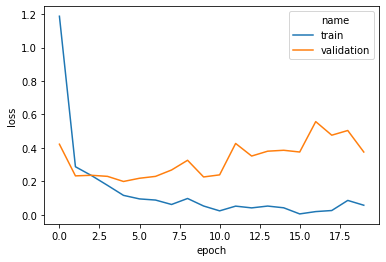

In [95]:
loss_plot = visualize.learning_curves("loss", metrics_df)

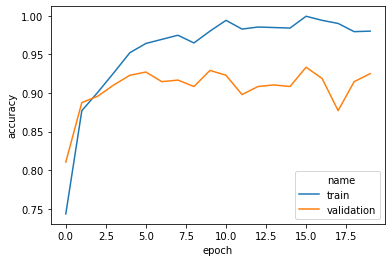

In [96]:
accuracy_plot = visualize.learning_curves("accuracy", metrics_df)

### Learning rate 0.3

In [99]:
model_metadata_file_path = model_dir.joinpath(model_id, start_time, "metadata.json")
model_metadata = io.read_metadata(str(model_metadata_file_path))
metrics_df = visualize.create_metrics_dataframe(history.history)

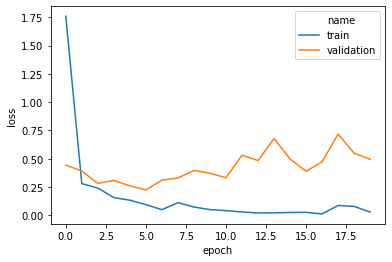

In [100]:
loss_plot = visualize.learning_curves("loss", metrics_df)

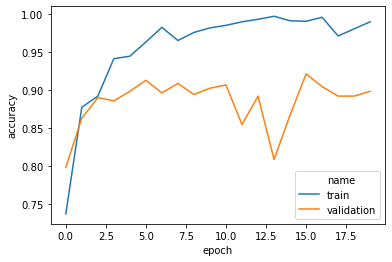

In [101]:
accuracy_plot = visualize.learning_curves("accuracy", metrics_df)

### Learning rate 0.1

In [104]:
model_metadata_file_path = model_dir.joinpath(model_id, start_time, "metadata.json")
model_metadata = io.read_metadata(str(model_metadata_file_path))
metrics_df = visualize.create_metrics_dataframe(history.history)

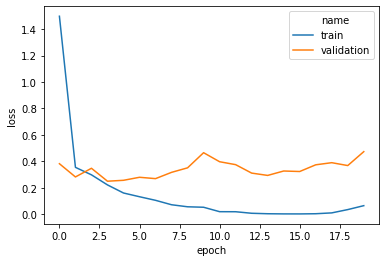

In [105]:
loss_plot = visualize.learning_curves("loss", metrics_df)

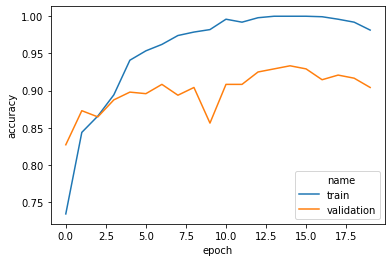

In [106]:
accuracy_plot = visualize.learning_curves("accuracy", metrics_df)

In [109]:
# Dense 128
model_metadata_file_path = model_dir.joinpath(model_id, start_time, "metadata.json")
model_metadata = io.read_metadata(str(model_metadata_file_path))
metrics_df = visualize.create_metrics_dataframe(history.history)

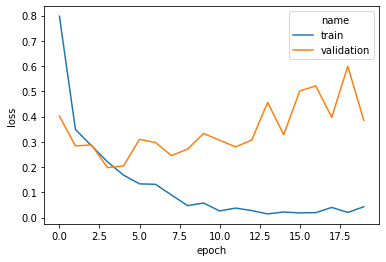

In [110]:
loss_plot = visualize.learning_curves("loss", metrics_df)

In [113]:
# Dense 1024
model_metadata_file_path = model_dir.joinpath(model_id, start_time, "metadata.json")
model_metadata = io.read_metadata(str(model_metadata_file_path))
metrics_df = visualize.create_metrics_dataframe(history.history)

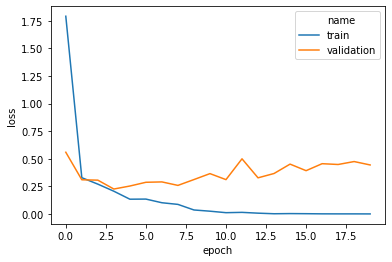

In [114]:
loss_plot = visualize.learning_curves("loss", metrics_df)

## Training dataset size increased

In [36]:
model_metadata_file_path = model_dir.joinpath(model_id, start_time, "metadata.json")
model_metadata = io.read_metadata(str(model_metadata_file_path))
metrics_df = visualize.create_metrics_dataframe(history.history)

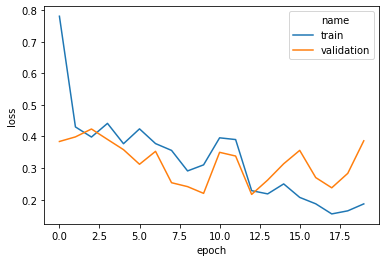

In [37]:
loss_plot = visualize.learning_curves("loss", metrics_df)

In [66]:
### 0.05
model_metadata_file_path = model_dir.joinpath(model_id, start_time, "metadata.json")
model_metadata = io.read_metadata(str(model_metadata_file_path))
metrics_df = visualize.create_metrics_dataframe(history.history)

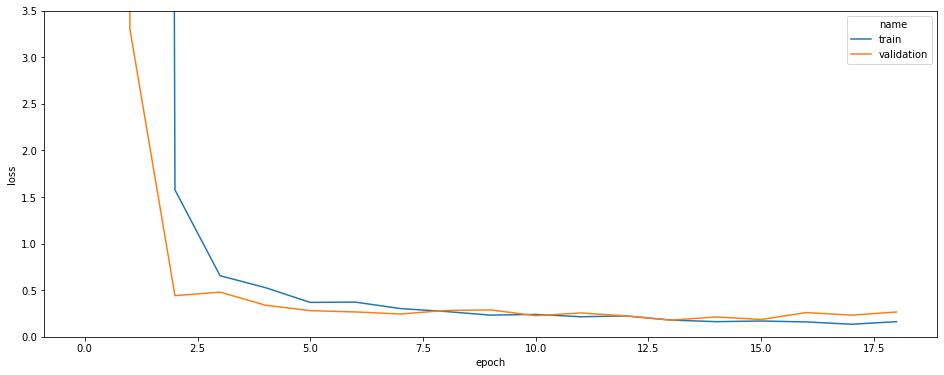

In [67]:
plt.figure(figsize=(16, 6))
plt.ylim(0, 3.5)

loss_plot = visualize.learning_curves("loss", metrics_df)

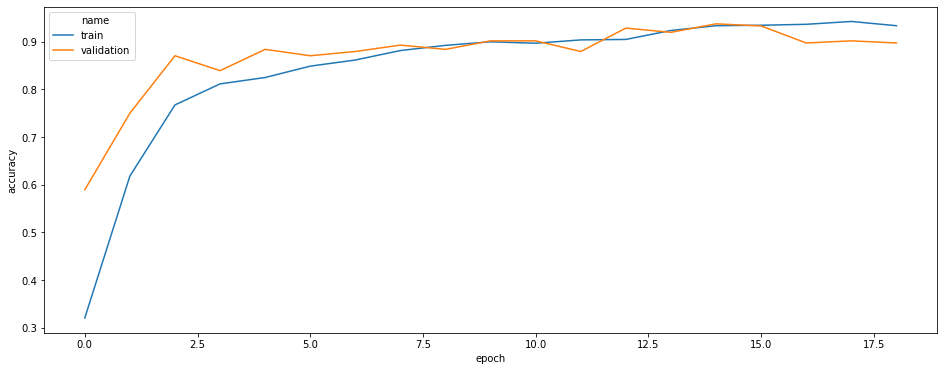

In [68]:
plt.figure(figsize=(16, 6))
accuracy_plot = visualize.learning_curves("accuracy", metrics_df)

In [47]:
# test
model_file_path = "/mnt/encrypted_sdb1/home/aj/Projects/ikapati/models/e85c77d0-4dbd-4b68-9a17-bbf0b9b53260/2020-01-27__01_0704/final.h5"
metadata_file_path = "/mnt/encrypted_sdb1/home/aj/Projects/ikapati/models/e85c77d0-4dbd-4b68-9a17-bbf0b9b53260/2020-01-27__01_0704/metadata.json"

model = tf.keras.models.load_model(model_file_path)
model_metadata = io.read_metadata(metadata_file_path)

In [48]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'filters': 96,
    'kernel_size': (11, 11),
    'strides': (4, 4),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'MaxPooling2D',
   'config': {'name': 'max_pooling2d',
    'trainable': True,
    'dtype': 'float32',
    'pool_size': (2, 2),
    'padding': 'same',
    'strides': (2, 2),
    'data_format': 'channels_last'}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_1',
    't

In [49]:
metrics_df = visualize.create_metrics_dataframe(model_metadata["history"])

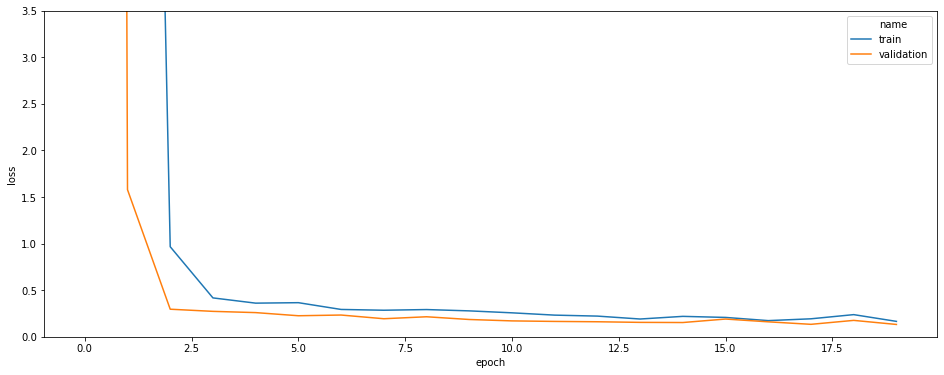

In [52]:
plt.figure(figsize=(16, 6))
plt.ylim(0, 3.5)
loss_plot = visualize.learning_curves("loss", metrics_df)

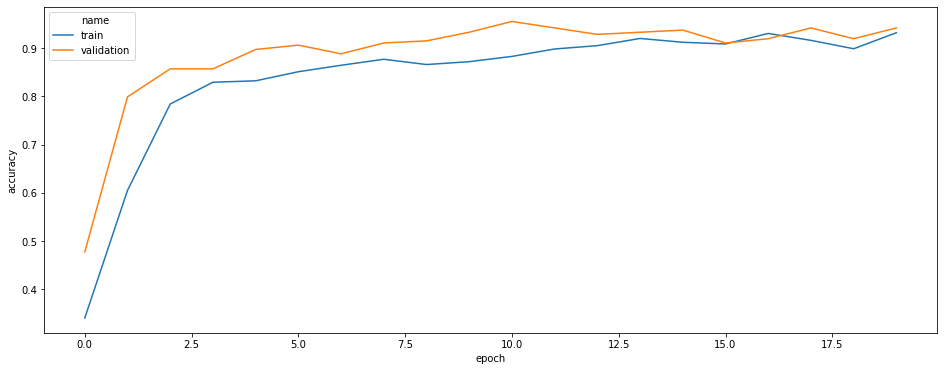

In [51]:
plt.figure(figsize=(16, 6))
accuracy_plot = visualize.learning_curves("accuracy", metrics_df)

In [32]:
model_metadata

{'id': 'e85c77d0-4dbd-4b68-9a17-bbf0b9b53260',
 'created_date': '2020-01-27 01:08:38',
 'arguments': {'batch_size': 32, 'epochs': 20, 'monitor': 'val_loss'},
 'dataset': {'id': 'e85c77d0-4dbd-4b68-9a17-bbf0b9b53260',
  'species': 'Corn',
  'num_classes': 4,
  'class_names': ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
   'Corn_(maize)___Common_rust_',
   'Corn_(maize)___Northern_Leaf_Blight',
   'Corn_(maize)___healthy'],
  'created_date': '2020-01-26 23:07:59',
  'file_counts': {'train': 2023, 'test': 253, 'eval': 253}},
 'history': {'loss': [477.73121700211175,
   22.107994378559173,
   0.966551550324001,
   0.41741102697357296,
   0.36115261344682603,
   0.3661555782670066,
   0.29349476666677565,
   0.2851331831207351,
   0.29231329096688163,
   0.27821396776135005,
   0.25727284474978374,
   0.2325480030406089,
   0.2220989287136093,
   0.19087294500971597,
   0.2192790645455557,
   0.20791717009648444,
   0.1736271008257828,
   0.1931625022774651,
   0.23790962698440704

In [55]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'filters': 96,
    'kernel_size': (11, 11),
    'strides': (4, 4),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'MaxPooling2D',
   'config': {'name': 'max_pooling2d',
    'trainable': True,
    'dtype': 'float32',
    'pool_size': (2, 2),
    'padding': 'same',
    'strides': (2, 2),
    'data_format': 'channels_last'}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_1',
    't

In [56]:
model.get_weights()

[array([[[[-1.19140577e-02,  1.18423644e-02,  1.08539192e-02, ...,
           -6.50766538e-03, -1.54179716e-02, -7.51584861e-03],
          [-7.84499571e-03,  5.68948162e-04, -7.46186450e-03, ...,
            2.01692153e-02,  1.63884051e-02, -1.23011507e-02],
          [-2.14514639e-02, -8.05072207e-03, -1.36004332e-02, ...,
            9.30297188e-03, -7.40772532e-03,  2.32399665e-02]],
 
         [[-4.98852041e-03,  1.89719722e-03, -6.41409482e-04, ...,
            2.14401688e-02,  2.06844620e-02, -1.74094792e-02],
          [-8.01644463e-04, -2.02054139e-02, -4.01758309e-03, ...,
           -1.60895362e-02, -1.41861187e-02,  2.47620279e-03],
          [ 3.45740165e-03, -1.79349780e-02, -7.40382262e-03, ...,
           -1.59567408e-02, -6.02308102e-03,  1.68605633e-02]],
 
         [[-4.91237035e-03,  5.40122949e-03, -1.22095030e-02, ...,
           -1.13482503e-02, -6.10214239e-03, -1.93838717e-03],
          [ 9.22883116e-03,  2.18323879e-02, -2.02531796e-02, ...,
            4.018